Привет, Павел! Как дела?) ☺️
<br> Меня зовут Дуолан 👋 Буду проверять твой проект. Давай вместе доведем его до идеала 😉
<br> Дальнейшее общение будет происходить на «ты», если это не вызывает никаких проблем.
<br> Желательно реагировать на каждый мой комментарий («исправил», «не понятно как исправить ошибку», ...)
<br> Пожалуйста, не удаляй мои комментарии, они будут необходимы для повторного ревью.

Комментарии будут в <font color='green'>зеленой</font>, <font color='blue'>синей</font> или <font color='red'>красной</font> рамках:

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Если все сделано отлично
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> Если можно немного улучшить
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b> Если требуются исправления
</div>

Работа не может быть принята с красными комментариями.

-------------------

Будет очень хорошо, если ты будешь помечать свои действия следующим образом:

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> ...
</div>

<div class="alert alert-block alert-info">
<b>Изменения:</b> Были внесены следующие изменения ...
</div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В нашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей.  
  
***Цель исследования:***  
Построить модель машинного обучения для определения стоимости б/у автомобилей на основе исторических данных.  
  
***Описание данных:***  
Признаки
DateCrawled — дата скачивания анкеты из базы  
VehicleType — тип автомобильного кузова  
RegistrationYear — год регистрации автомобиля  
Gearbox — тип коробки передач  
Power — мощность (л. с.)  
Model — модель автомобиля  
Kilometer — пробег (км)  
RegistrationMonth — месяц регистрации автомобиля  
FuelType — тип топлива  
Brand — марка автомобиля  
NotRepaired — была машина в ремонте или нет  
DateCreated — дата создания анкеты  
NumberOfPictures — количество фотографий автомобиля  
PostalCode — почтовый индекс владельца анкеты (пользователя)  
LastSeen — дата последней активности пользователя  
  
Целевой признак  
Price — цена (евро)  
  
***План работы***  
  
Загрузить и изучить данные.  
Заполнить пропущенные значения и обработать аномалии в столбцах.  
Подготовить выборки для обучения моделей.  
Обучить модели, с разными гиперпараметрами.  
Проанализировать время обучения, время предсказания и качество моделей.  
Выбрать лучшую модель, проверить её качество на тестовой выборке.  

***Примечания:***
Для оценки качества моделей используется метрика RMSE.
Значение метрики RMSE должно быть меньше 2500.
  
***Критерии оценки:***

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b> 

Важно чтобы в проектах было подробное описание: когда потенциальные работодатели будут смотреть твой проект в портфолио, им нужно будет понимать задачу, чтобы можно было оценить её решение. Вот что можно добавить:
    
* Описание целей и задачи проекта
* Описание данных
* План работы
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Ок
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

## Подготовка данных

### Загрузка и изучение данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.model_selection import cross_val_score

from catboost import CatBoostRegressor
import lightgbm as lgb

import warnings
warnings.filterwarnings('ignore')

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Импорт выглядит отлично 👍
</div>

In [2]:
try:
    df = pd.read_csv("D:\\практикум\\датасеты для проектов\\autos.csv")
except:
    df = pd.read_csv("/datasets/autos.csv")

In [3]:
df.info()
df.sample(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
185053,2016-03-23 12:49:08,3500,wagon,2006,manual,101,astra,125000,8,gasoline,opel,no,2016-03-23 00:00:00,0,7549,2016-03-24 20:16:36
58366,2016-03-25 13:52:32,2300,wagon,1997,auto,286,5er,150000,7,petrol,bmw,no,2016-03-25 00:00:00,0,74336,2016-04-06 16:44:36
213463,2016-03-05 16:51:07,1199,wagon,1996,manual,150,a6,150000,8,petrol,audi,no,2016-03-05 00:00:00,0,74936,2016-03-26 03:47:17
329972,2016-03-06 17:37:21,2990,wagon,2002,manual,101,passat,150000,2,gasoline,volkswagen,no,2016-03-06 00:00:00,0,26670,2016-03-08 10:16:18
163212,2016-04-01 19:58:40,1000,wagon,1999,manual,165,a4,150000,5,NaN,audi,NaN,2016-04-01 00:00:00,0,87767,2016-04-03 17:44:38
301378,2016-03-31 13:38:34,500,small,1996,manual,75,1_reihe,150000,10,petrol,mazda,no,2016-03-31 00:00:00,0,86368,2016-04-06 05:46:46
297999,2016-03-12 12:58:33,1400,small,2000,manual,75,golf,150000,2,NaN,volkswagen,no,2016-03-12 00:00:00,0,26133,2016-03-24 04:20:07
114895,2016-03-22 09:54:30,1000,wagon,1995,NaN,0,v60,150000,0,petrol,volvo,NaN,2016-03-22 00:00:00,0,28213,2016-03-31 04:17:04
91314,2016-03-30 20:36:23,15500,NaN,2005,auto,476,e_klasse,150000,0,NaN,mercedes_benz,no,2016-03-30 00:00:00,0,31840,2016-04-01 16:44:35
206027,2016-03-05 19:06:21,2390,wagon,2000,manual,163,e_klasse,150000,8,petrol,mercedes_benz,NaN,2016-03-05 00:00:00,0,63263,2016-03-25 19:16:42


Мы видим, что даты имеют неподходящий тип данных. И что в некоторых столбцах присутствует немалое кол-во пропусков. Названия столбцов записаны в нестандартном формате.

In [101]:
# распределение данных в числовых столбцах
df.describe()

,price,registration_year,power,kilometer,postal_code
count,284870.000000,284870.000000,284870.000000,284870.000000,284870.000000
mean,4931.748629,2002.780546,121.468884,128452.153614,4.637414
std,4602.531394,5.742814,52.672318,36416.491947,2.557751
min,155.000000,1976.000000,31.000000,5000.000000,0.000000
25%,1400.000000,1999.000000,80.000000,125000.000000,3.000000
50%,3299.000000,2003.000000,115.000000,150000.000000,5.000000
75%,7000.000000,2007.000000,150.000000,150000.000000,7.000000
max,20000.000000,2015.000000,449.000000,150000.000000,9.000000


<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Чтобы включить в таблицу категориальные признаки, в параметрах можно указать `include='all'`
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Так выглядит мусорно. я делал отдельную табличку для категориальных. показалась неинформативной. убрал
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

На этом этапе можно сделать несколько выводов относительно аномалий в данных:  
1. минимальная цена равна 0
2. Минимальный год регистрации авто 1000, максимальный 9999
3. так же удивляет минимальная и максимальная мощность двигателя
4. среди месяцев регистрации присутствуют нули
5. количество фотографий равно 0 для всех объектов. столбец неинформативен
6. минимальное значение почтового кода состоит из меньшего количества цифр, чем основное колво значений

In [5]:
# табличка пропусков
isna_table = pd.DataFrame(df.isna().sum(), columns=["кол-во пропусков"])
isna_table["доля пропусков"] = df.isna().mean().round(3)
isna_table

,кол-во пропусков,доля пропусков
DateCrawled,0,0.000
Price,0,0.000
VehicleType,37490,0.106
RegistrationYear,0,0.000
Gearbox,19833,0.056
Power,0,0.000
Model,19705,0.056
Kilometer,0,0.000
RegistrationMonth,0,0.000
FuelType,32895,0.093


Имеются пропуски:  
1. по 5,6 процентов пропусков в столбцах с коробкой передач и модлью авто, 
2. 9 процентов в типе топлива, 
3. 10 в типе кузова
4. и 20 в бинарном признаке, подвергалась ли машина ремонту 

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍 
</div>

In [6]:
# смотрим кол-во уникальных значений
unique_list = []
for column in df.columns:
    unique_list.append(len(df[column].unique()))
    
pd.DataFrame(unique_list, index=df.columns)

,0
DateCrawled,271174
Price,3731
VehicleType,9
RegistrationYear,151
Gearbox,3
Power,712
Model,251
Kilometer,13
RegistrationMonth,13
FuelType,8


151 уникальный год регистрации, вероятно связан с тем, что мы имеем значения от раннего средневековья до далекого будущего.  
13 значений километража говорят о том, что мы имеем дело с дискретным признаком  
13 месяцев - подтверждение очевидного. присутствия 0 в значении месяцев регистрации  
3 значения в бинарной классификации - что-то новенькое

In [7]:
# дубликаты
df.duplicated().sum()

4

Дубликатов всего 4. и это действительно дубликаты, учитывая, что у нас есть временные метки до секунд. Удалим их

In [8]:
df = df.drop_duplicates().reset_index(drop=True)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

От явных дубликатов избавились 👍
</div>

#### Вывод

Загружена и первично изучена таблица с данными характеристик подержанных автомобилей  
Обнаружены:  
* пропуски в категориальных признаках
* аномалии в количественных признаках
* 2 очевидно неинформативных столбца (кол-во фотографий, и дата последней активности пользователя)
* даты имеют не подходящий тип данных.
* названия столбцов в нестандартном формате
Ниже все будет подробно рассмотрено

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Ты хорошо владеешь методами первичного анализа данных 👍 Спасибо за информативный вывод)
</div>

### Предобработка

Приведем названия столбцов к змеиному регистру

In [9]:
# колонки
new_columns_list = []
for column in df.columns:
    new_column_name = ""
    for x in column:
        if x < "a":
            new_column_name += "_" + x.lower()
        else:
            new_column_name += x
    new_columns_list.append(new_column_name[1:])
df.columns = new_columns_list
df.head(0)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Работать с такими названиями гораздо удобнее) Посмотри на такой вариант ниже. Здесь мы используем регулярные выражения.

Полезная <a href='https://habr.com/ru/post/545150/'>статья</a> про regex для начала
    
Этот блогер хорошо объясняет в своем <a href='https://www.youtube.com/watch?v=sHw5hLYFaIw&t=247s'>видео</a>
</div>

```python
df.columns = df.columns.str.replace(r"([A-Z])", r" \1").str.lower().str.replace(' ', '_').str[1:]
```

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Спасибо! пока ничего в этом не понимаю
</div>

Для удобной работы с датами приведем их к типу datetime

In [10]:
df["date_crawled"] = pd.to_datetime(df["date_crawled"], format="%Y-%m-%d %H:%M:%S")
df["date_created"] = pd.to_datetime(df["date_created"], format="%Y-%m-%d %H:%M:%S")
df["last_seen"] = pd.to_datetime(df["last_seen"], format="%Y-%m-%d %H:%M:%S")
df.dtypes

date_crawled          datetime64[ns]
price                          int64
vehicle_type                  object
registration_year              int64
gearbox                       object
power                          int64
model                         object
kilometer                      int64
registration_month             int64
fuel_type                     object
brand                         object
not_repaired                  object
date_created          datetime64[ns]
number_of_pictures             int64
postal_code                    int64
last_seen             datetime64[ns]
dtype: object

In [11]:
# смотрим распределение
df[["date_crawled", "date_created", "last_seen"]].describe()

,date_crawled,date_created,last_seen
count,354365,354365,354365
unique,271174,109,179150
top,2016-03-24 14:49:47,2016-04-03 00:00:00,2016-04-06 13:45:54
freq,7,13718,17
first,2016-03-05 14:06:22,2014-03-10 00:00:00,2016-03-05 14:15:08
last,2016-04-07 14:36:58,2016-04-07 00:00:00,2016-04-07 14:58:51


Из распределения мы видим, что все данные были скачаны в течение одного месяца, при этом анкеты создавались в течение 2х лет. старость анкеты может влиять на цену. посмотрим на распределение разницы между датой заполнения анкеты и датой скачивания

In [12]:
df["spent_time"] = df["date_crawled"] - df["date_created"]

In [13]:
df["spent_time"].describe()

count                       354365
mean     0 days 17:46:02.937417634
std      2 days 03:19:24.174750022
min                0 days 00:06:39
25%                0 days 12:51:52
50%                0 days 16:48:31
75%                0 days 20:36:20
max              737 days 11:48:06
Name: spent_time, dtype: object

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

Максимально 737 дней, а в среднем 0. Очевидно, мы имеем дело с малой долей старых объявлений

In [14]:
# проверяем
pd.DatetimeIndex(df["date_created"]).year.value_counts()

2016    354339
2015        25
2014         1
Name: date_created, dtype: int64

На 14 и 15 год приходится 26 объявлений.Подавляющее большинство объявлений было создано и скачано из базы в течении одного месяца в 16 году, поэтому удалим старые объявления на случай, если были какие-то скачки цен на рынке подержанных авто, к тому же цены на долго висящие предложения вероятнее всего неадекватны.
Исходя из задачи создания рекомендательной системы, определяющей "правильную" цену авто, нам необходимы максимально адекватные и правдоподобные данные, а значит выбросы нам ни к чему. Удалим их

In [15]:
df = df[pd.DatetimeIndex(df["date_created"]).year == 2016]

In [16]:
pd.DatetimeIndex(df["date_created"]).year.value_counts()

2016    354339
Name: date_created, dtype: int64

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Согласен 👍
</div>

Добъем вопрос с датами. Посмотрим, как распределены месяцы регистрации, попытаемся понять откуда взялся нулевой месяц

In [17]:
df["registration_month"].value_counts()

0     37350
3     34370
6     31503
4     29266
5     29151
7     27211
10    26099
12    24289
11    24184
9     23810
1     23213
8     22627
2     21266
Name: registration_month, dtype: int64

In [18]:
# посмотрим на данные нулевого месяца
df[df["registration_month"] == 0].sample(10)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,not_repaired,date_created,number_of_pictures,postal_code,last_seen,spent_time
61567,2016-03-08 10:40:12,3333,sedan,2003,auto,211,vectra,150000,0,petrol,opel,yes,2016-03-08,0,29353,2016-04-07 01:16:50,0 days 10:40:12
22564,2016-03-09 17:46:27,600,NaN,1995,NaN,0,transporter,150000,0,NaN,volkswagen,NaN,2016-03-09,0,38302,2016-03-10 13:47:05,0 days 17:46:27
71419,2016-04-01 19:42:09,2800,NaN,2005,NaN,0,5er,150000,0,NaN,bmw,NaN,2016-04-01,0,13585,2016-04-05 15:45:06,0 days 19:42:09
222414,2016-03-30 14:44:49,1900,small,1999,auto,55,fortwo,60000,0,petrol,smart,NaN,2016-03-30,0,48607,2016-03-30 14:44:49,0 days 14:44:49
165718,2016-04-02 19:57:47,0,NaN,2000,NaN,0,golf,150000,0,NaN,volkswagen,NaN,2016-04-02,0,97483,2016-04-06 20:17:40,0 days 19:57:47
286061,2016-03-12 00:49:27,0,NaN,1980,NaN,0,NaN,100000,0,NaN,sonstige_autos,NaN,2016-03-11,0,13507,2016-04-05 14:45:48,1 days 00:49:27
190474,2016-03-22 18:55:33,500,NaN,2000,NaN,0,NaN,5000,0,gasoline,mercedes_benz,NaN,2016-03-22,0,59065,2016-03-22 18:55:33,0 days 18:55:33
325039,2016-03-26 21:58:10,0,coupe,1993,manual,150,3er,150000,0,petrol,bmw,NaN,2016-03-26,0,45468,2016-04-06 13:16:44,0 days 21:58:10
89464,2016-03-20 20:38:54,2100,NaN,2017,NaN,0,polo,150000,0,petrol,volkswagen,no,2016-03-20,0,66822,2016-03-24 13:46:03,0 days 20:38:54
272631,2016-04-03 18:54:26,500,coupe,1991,manual,150,3er,150000,0,NaN,bmw,yes,2016-04-03,0,25842,2016-04-05 19:19:18,0 days 18:54:26


Никаких предположений. Однако месяцы нам, вероятнее всего и не пригодятся.  
Посмотрим на распределение года регистрации

<AxesSubplot:>

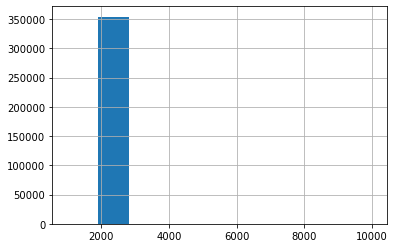

In [19]:
df["registration_year"].hist()

Все данные, как и предполагалось сконцентрированы в районе правдоподобных значений.  
Судя по разбросу количественных признаков мы будем иметь дело с большим количеством выбросов. напишем функцию, для обрезки неправдоподобных данных (выбросов)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

In [20]:
def real_data_cutter(col_name, min_val, max_val):
    """Функция принисает на вход столбец, значение предполагаемого минимума и максимума и возвращает
    тот же столбец без выбросов, а так же показывает долю отсеченных данных, обновленное распределение и 
    график соотношения рассматриваемого признака с целевым"""
    real = df[(df[col_name] > min_val) & (df[col_name] < max_val)]
    plt.figure(figsize=(12, 6))
    real[col_name].hist()
    plt.figure(figsize=(12, 12))
    plt.scatter(x=real[col_name], y=real["price"], alpha=0.1)
    print(f" доля отсеченных данных: {(1 - len(real) / len(df)):.1%}")
    return real

 доля отсеченных данных: 0.2%


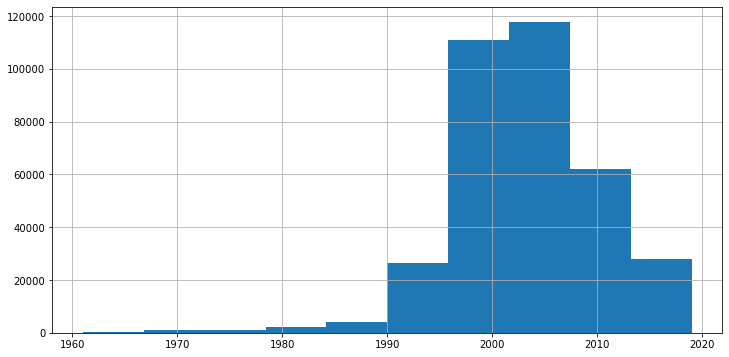

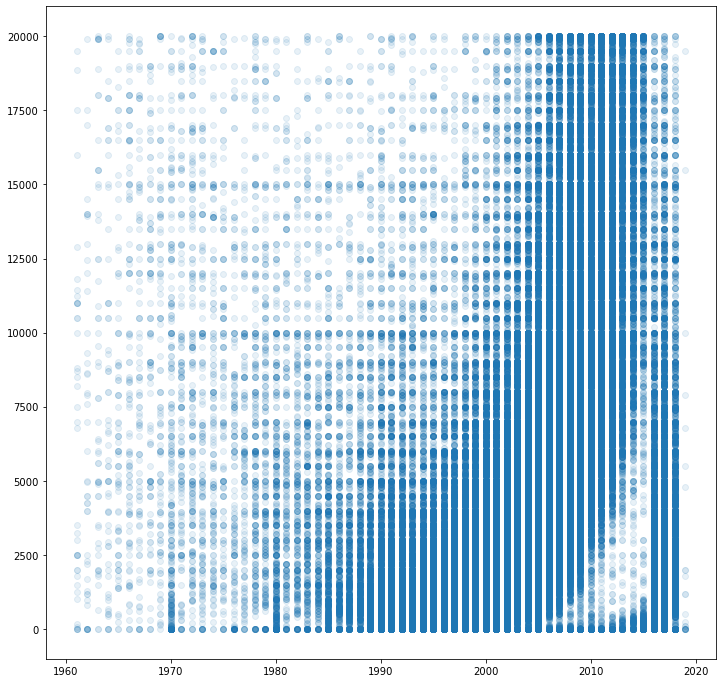

In [21]:
# устанавливаем вменяемые рамки
real_reg_year = real_data_cutter("registration_year", 1960, 2022)

Мы видим, что в районе 80-х годов данные принимают систематизированный вид. все, что раньше разбросанно бессистемно, это связано с тем, что в этой категории достаточно мало объявлений, и состояние авто может быть крайне разным. Начиная от дорогого отреставрированного ретро до металлолома. Полагаю, такие разрозненные данные для наших целей не нужны. Можно обрезать их до 75го года. Так же мы видим, что "самые новые" автомобили сконцентрированы в районе низких цен, последние 4 года имеют обратное предыдущей тенденции распределение, к тому же даты размещения объявлений заканчиваются в начале апреля 16го года. отсечем недостоверные данные

 доля отсеченных данных: 4.8%


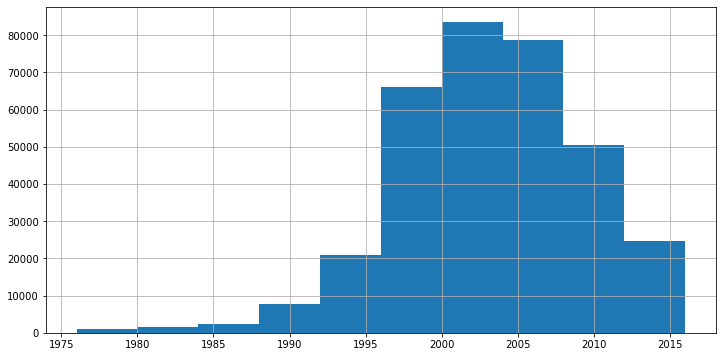

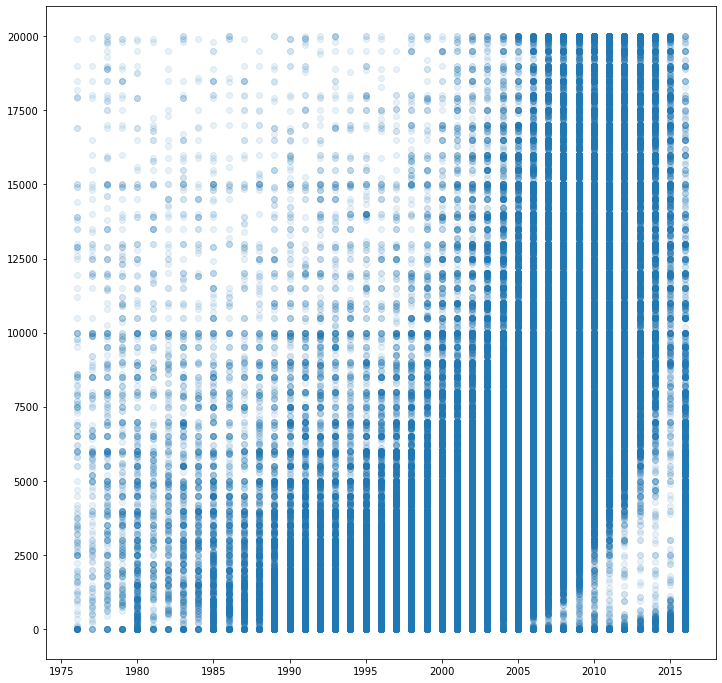

In [22]:
real_reg_year = real_data_cutter("registration_year", 1975, 2017)

Попробуем убрать лишнюю часть 16го года

In [23]:
df2016 = df[(df["registration_year"] == 2016) & (df["registration_month"] < 4)]
df = df[df["registration_year"] < 2016]
df = df.merge(df2016, how="left").reset_index(drop=True)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что для верхней границы используешь дату скачивания анкеты 👍
</div>

 доля отсеченных данных: 0.8%


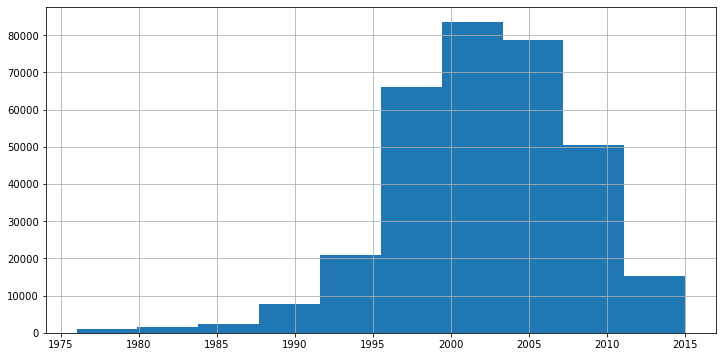

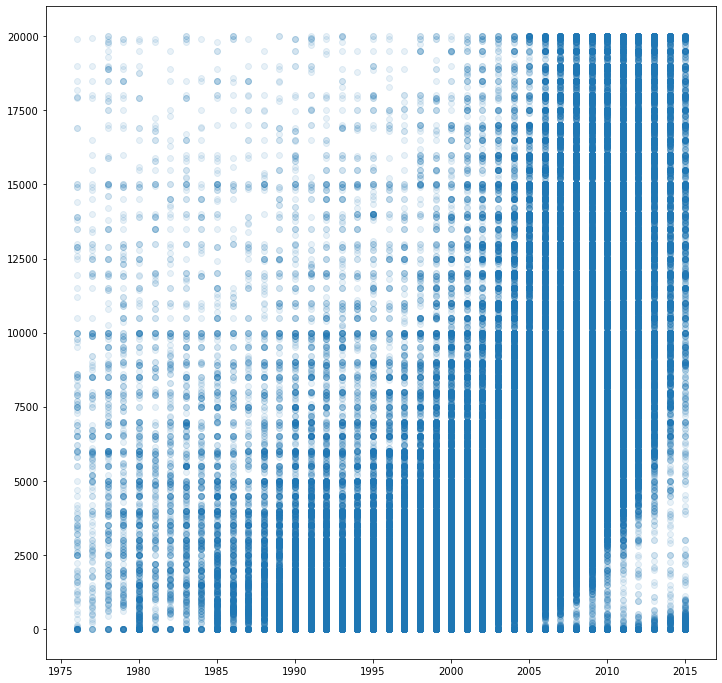

In [24]:
# проверяем
real_reg_year = real_data_cutter("registration_year", 1975, 2017)

И мы получили идеальное правдоподобие

In [25]:
# присваиваем основной таблице обновленные данные
df = real_reg_year

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

Мы разобрались со всеми датами. Для обучения модели нам понадобится только год регистрации. Удалим все неинформативные столбцы.  
Для удобства создадим функцию напоминалку

In [26]:
def reminder(col_name=None):
    """Функция принимает на вход название колонки и выводит основные характеристики
    признака в ней. В случае передачи в качестве параметра ошибочного названия
    колонки, выводит перечень колонок"""
    if col_name not in df.columns:
        print(f"Выбирай, хороший человек! \n\n{df.columns}")
    elif col_name:
        table = []
        table_ind = ["isna", "isna_share",]
        table.append(df[col_name].isna().sum())
        table.append(df[col_name].isna().mean().round(2))
        if df[col_name].dtype == "object":
            table_ind.append("unique")
            unique = len(df[col_name].unique())
            table.append(unique)
            display(pd.DataFrame(table, index=table_ind))
            if unique <= 40:
                plt.figure(dpi=150)
                df[col_name].value_counts(dropna=False).plot(kind="bar")
        else:
            table_ind.extend(["min", "max", "mean", "median"])
            table.append(df[col_name].min())
            table.append(df[col_name].max())
            table.append(df[col_name].mean())
            table.append(df[col_name].median())
            plt.figure(figsize=(12, 7))
            df[col_name].hist()
            display(pd.DataFrame(table, index=table_ind))


In [27]:
reminder()

Выбирай, хороший человек! 

Index(['date_crawled', 'price', 'vehicle_type', 'registration_year', 'gearbox',
       'power', 'model', 'kilometer', 'registration_month', 'fuel_type',
       'brand', 'not_repaired', 'date_created', 'number_of_pictures',
       'postal_code', 'last_seen', 'spent_time'],
      dtype='object')


In [28]:
df = df.drop(['date_crawled', 'registration_month', 'date_created', 'number_of_pictures', 'last_seen', 'spent_time'], axis=1)
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired,postal_code
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN,70435
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes,66954
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN,90480
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no,60437


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Удалить неинформативные признаки - хорошее решение 👍
</div>

In [29]:
# смотрим на обновленную табличку пропусков
isna_table = pd.DataFrame(df.isna().sum(), columns=["кол-во пропусков"])
isna_table["доля пропусков"] = df.isna().mean().round(4)
isna_table

,кол-во пропусков,доля пропусков
price,0,0.0000
vehicle_type,13134,0.0401
registration_year,0,0.0000
gearbox,15960,0.0487
power,0,0.0000
model,15626,0.0477
kilometer,0,0.0000
fuel_type,22973,0.0701
brand,0,0.0000
not_repaired,59479,0.1815


рассмотрим подробнее взаимосвязи между оставшимися признаками

<Figure size 432x288 with 0 Axes>

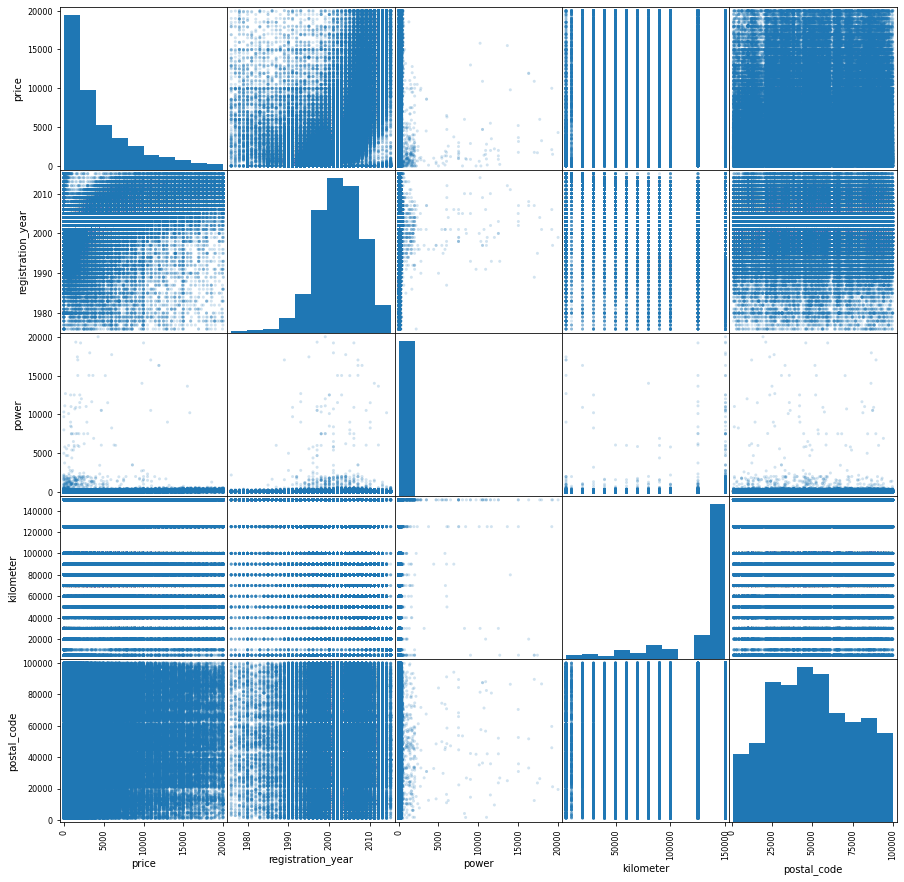

In [30]:
plt.figure()
pd.plotting.scatter_matrix(df, figsize=(15, 15), alpha=0.2)
plt.show()

<AxesSubplot:>

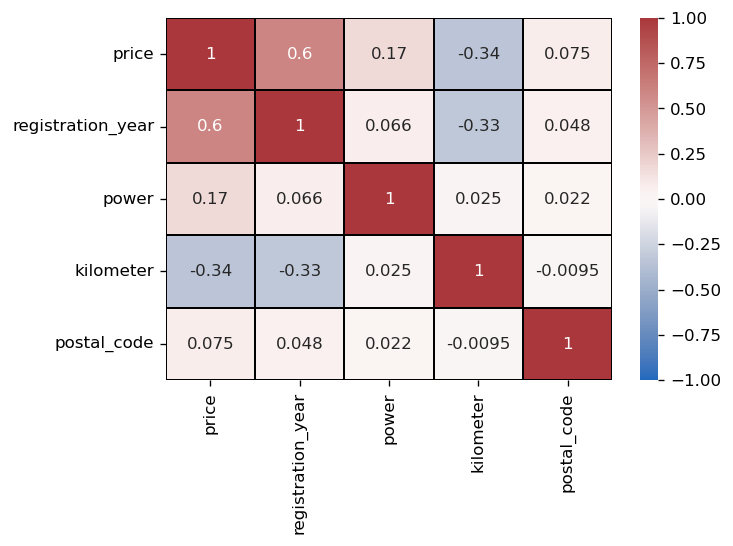

In [31]:

plt.figure(dpi=120)
sns.heatmap(df.corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= "vlag", linewidths=1, linecolor='black')

На матрице корреляций наибольшее значение корреляции между ценой и годом регистрации. это как раз тот признк, который мы почистили от аномальных значений. На матрице рассеяния  тоже видна линейная зависимость между этими признаками, а так же видны значительные выбросы в распределении мощности двигателя.  
Так же присутствует небольшая отрицательная корреляция между пробегом и ценой.  

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

Рассмотрим распределение целевого признака

<AxesSubplot:>

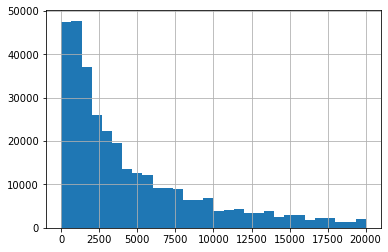

In [32]:
df["price"].hist(bins=30)

На первый взгляд все выглядит вполне правдоподобно. Посмотрим ближе на крайние значения.

<AxesSubplot:>

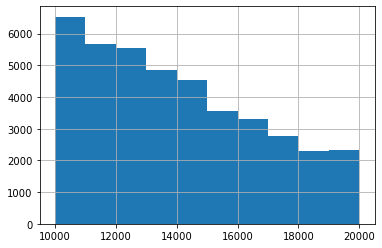

In [33]:
# жирный хвост
df[df["price"] > 10000]["price"].hist()

<AxesSubplot:>

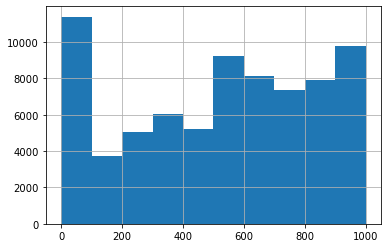

In [34]:
# начало
df[df["price"] < 1000]["price"].hist()

мы видим всплеск нулевых значений. приблизим еще

<AxesSubplot:>

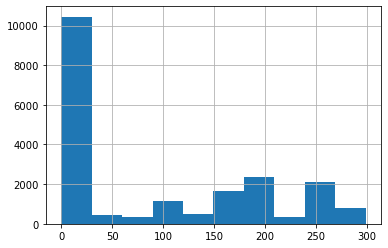

In [35]:
df[df["price"] < 300]["price"].hist()

Будем считать, что цена на б/у авто ниже 150 евро - это запредельно неправдоподобно. Избавимся от таковых.

In [36]:
len(df[df["price"] < 150]) / len(df) 

0.03923411683563542

 ниже 150 евро 4 процента. 

In [37]:
df = df[df["price"] > 150]

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

В данных остались машины только с адекватной ценой 👍
</div>

,0
isna,9353.00
isna_share,0.03
unique,9.00


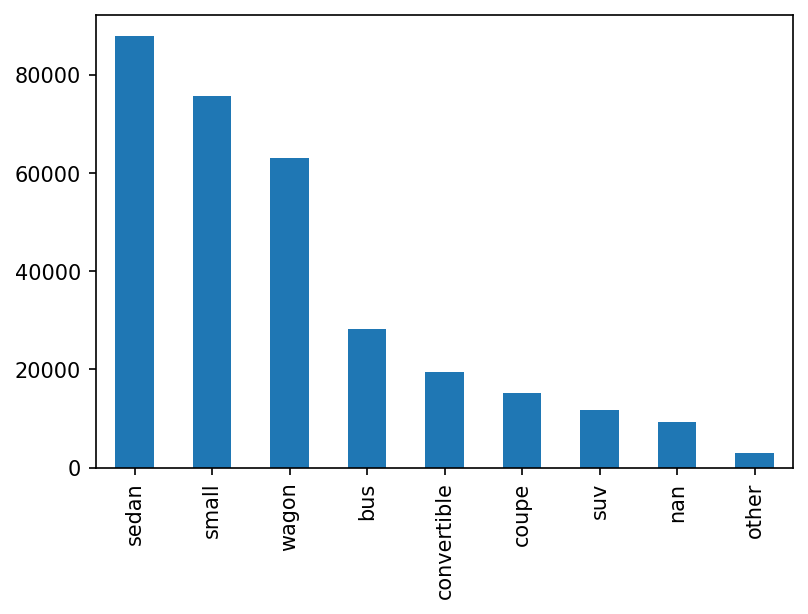

In [38]:
# тип кузова
reminder("vehicle_type")

В этом признаке присутвуют пропуски.  
Посмотрим у каких моделей не указан тип кузова

In [39]:
df[df["vehicle_type"].isna()]["model"].unique()

array(['golf', '5er', 'ka', 'insignia', 'civic', '3er', 'punto', 'caddy',
       nan, 'c1', '1er', 'transporter', 'zafira', 'qashqai', 'twingo',
       'corsa', 'lanos', 'fiesta', 'astra', 'other', 'fusion', 'ibiza',
       'polo', 'a3', 'vectra', 'v70', 'e_klasse', '2_reihe', 'fortwo',
       'passat', 'berlingo', 'a4', 'primera', 'freelander', 'i_reihe',
       'touran', 'kaefer', 'samara', 'agila', 'focus', '500', 'mx_reihe',
       'v40', '3_reihe', 'modus', 'carnival', 'stilo', '6_reihe',
       'sharan', 'octavia', 'grand', '601', 'laguna', 'v_klasse', 'leon',
       'roadster', 'tt', 'fox', 'c_klasse', 'a_klasse', 'a6', 'auris',
       'ceed', 'sprinter', 'alhambra', 'clio', 'picanto', 'megane',
       'micra', 'arosa', 'bora', 'doblo', 'fabia', 'scenic', 'cr_reihe',
       'mondeo', 'espace', 'escort', 'one', 'b_klasse', 'aygo', 'mustang',
       'colt', 'lupo', 'transit', 'ducato', 'a5', 'rx_reihe', 'jimny',
       'ptcruiser', 'scirocco', 'combo', 'omega', 'tigra', 'lancer',


их достаточно много. Посмотрим, на типы кузовов самой популярной модели

In [40]:
# самая популярная модель
df["model"].value_counts().head(1)

golf    25355
Name: model, dtype: int64

In [41]:
# типы кузовов
df[df["model"] == "golf"]["vehicle_type"].value_counts()

sedan          14403
small           3594
wagon           3117
convertible     1889
bus              757
coupe            406
other            166
suv               24
Name: vehicle_type, dtype: int64

Исходя из того, что у одной модели может быть по меньшей мере 7 типов кузова, заполнить этот признак достоверными данными не получится. Можно удалить данные с пропусками, а можно заполнить пропуски новой категорией, чтобы не терять остальные данные, которые могут быть полезны. Я выбираю второе

In [42]:
# заполняем пропуски
df["vehicle_type"] = df["vehicle_type"].fillna(value="unknown")

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

In [43]:
df["vehicle_type"].isna().sum()

0

,0
isna,12441.00
isna_share,0.04
unique,3.00


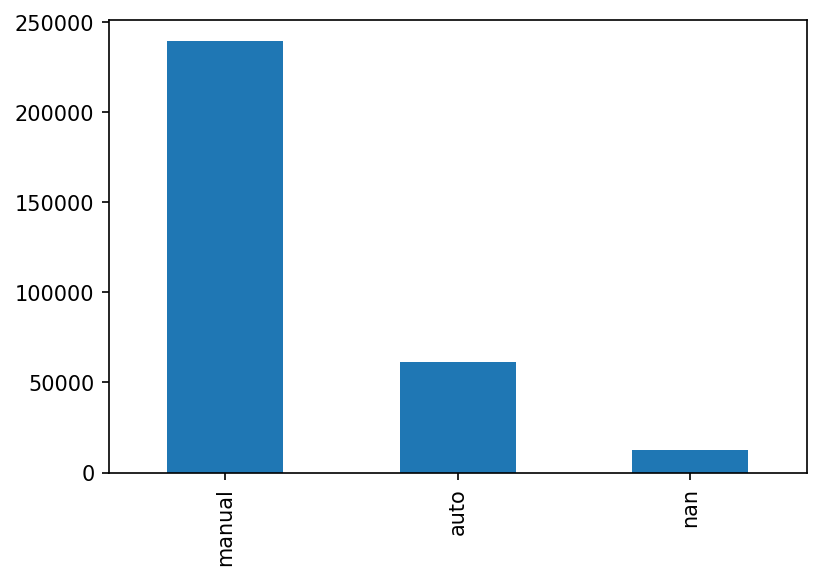

In [44]:
# смотрим на коробки передач
reminder('gearbox')

Аналогичная ситуация. коробка может быть ручной, а может авто. Создаем категорию unknown

In [45]:
df["gearbox"] = df["gearbox"].fillna(value="unknown")

In [46]:
df["gearbox"].unique()

array(['manual', 'auto', 'unknown'], dtype=object)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

Рассмотрим мощность

,0
isna,0.000000
isna_share,0.000000
min,0.000000
max,20000.000000
mean,114.035697
median,105.000000


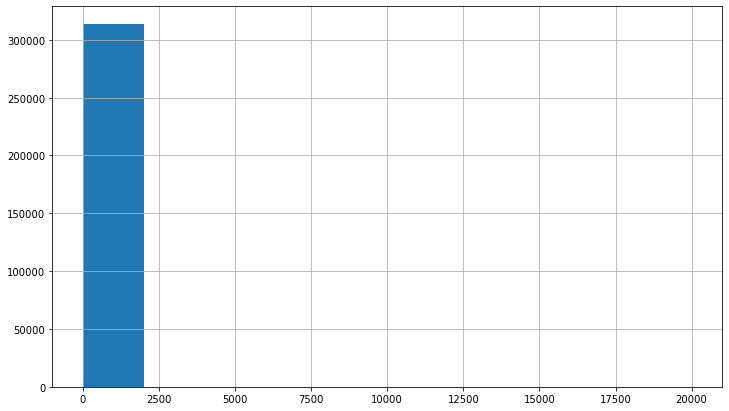

In [47]:
reminder("power")

снова выбросы. выберем промежуток с правдоподобными данными

 доля отсеченных данных: 8.8%


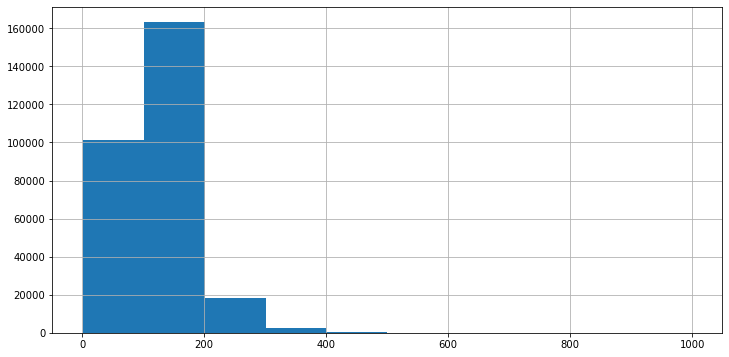

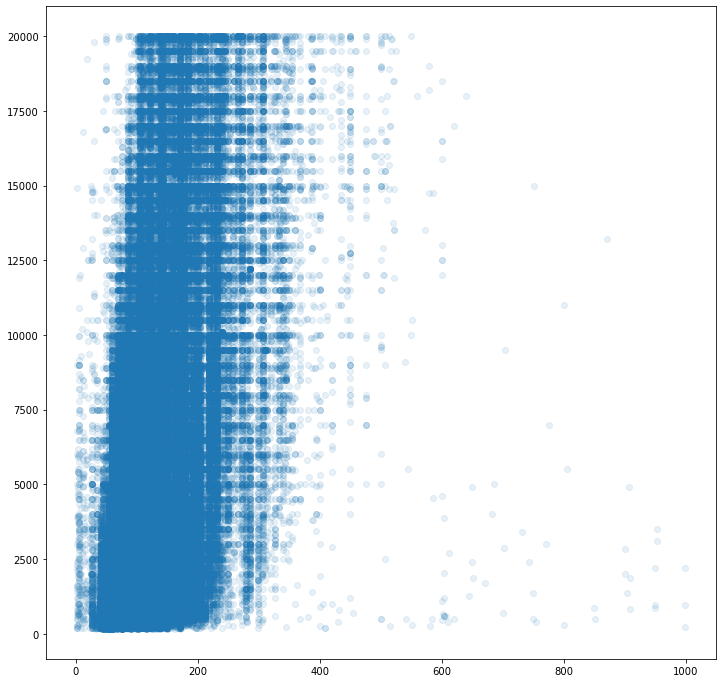

In [48]:
real_power = real_data_cutter("power", 0, 1000)

 доля отсеченных данных: 9.1%


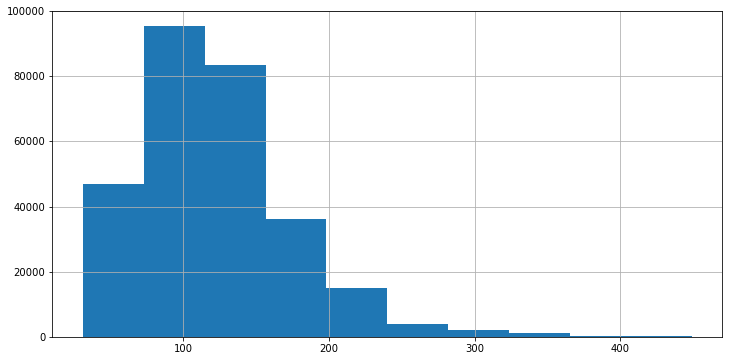

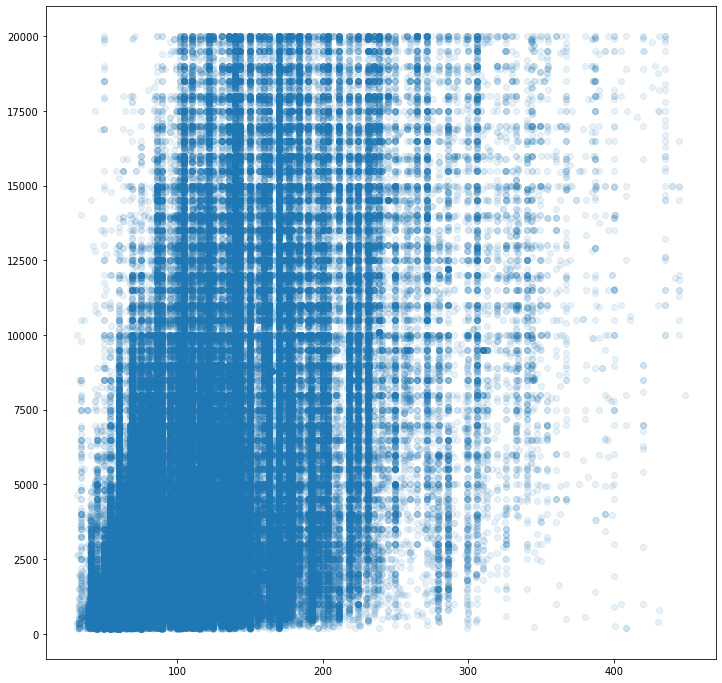

In [49]:
real_power = real_data_cutter("power", 30, 450)

Цель достигнута

In [50]:
# присваиваем основной таблице обновленные данные
df = real_power

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Мощность ограничили 👍
</div>

Посмотрим на столбец с моделями

In [51]:
reminder("model")

,0
isna,9560.00
isna_share,0.03
unique,250.00


Имеются пропуски. Нет возможности заполнить их достоверными значениями. Поступим так же, как в предыдущих ситуациях.

In [52]:
# заполняем пропуски новой категорией
df["model"] = df["model"].fillna("unknown")
df["model"].isna().sum()

0

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

<AxesSubplot:>

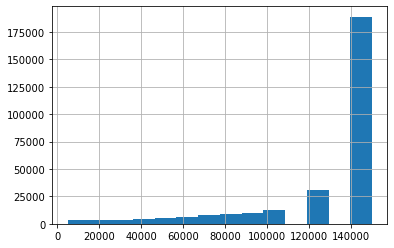

In [53]:
# смотрим на пробег
df["kilometer"].hist(bins=14)

In [54]:
df["kilometer"].value_counts()

150000    188783
125000     30950
100000     12332
90000      10007
80000       8775
70000       7571
60000       6619
50000       5489
40000       4362
30000       3747
20000       3085
5000        2303
10000        847
Name: kilometer, dtype: int64

Здесь все выглядит вполне правдоподобно. Основная доля автомобилей с большим пробегом, и чем меньше пробег, тем меньше доля. Судя по всему в колонку 140000 вошли и большие значения. Признак очевидно дискретный

,0
isna,12232.00
isna_share,0.04
unique,8.00


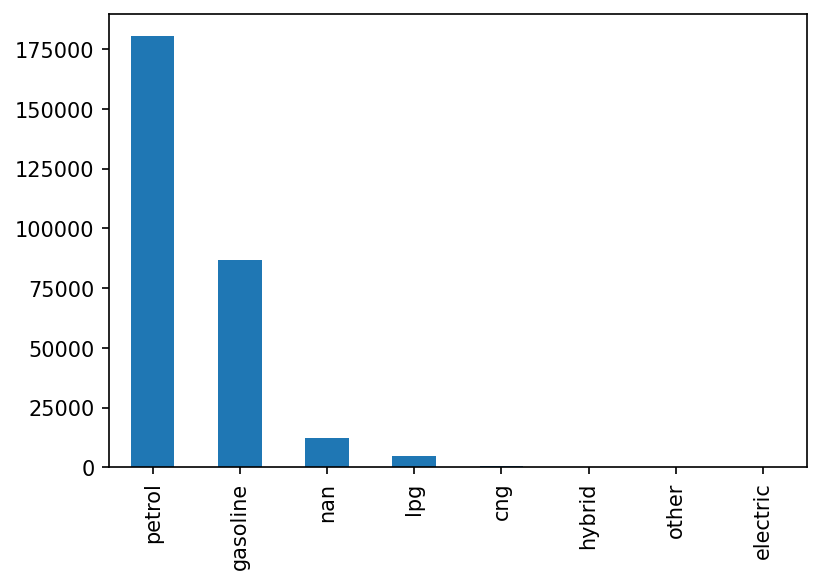

In [55]:
# тип топлива
reminder("fuel_type")

Заполним пропуски новой категорией

In [56]:
df["fuel_type"] = df["fuel_type"].fillna(value="unknown")

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

Теперь взглянем на бренды

,0
isna,0.0
isna_share,0.0
unique,40.0


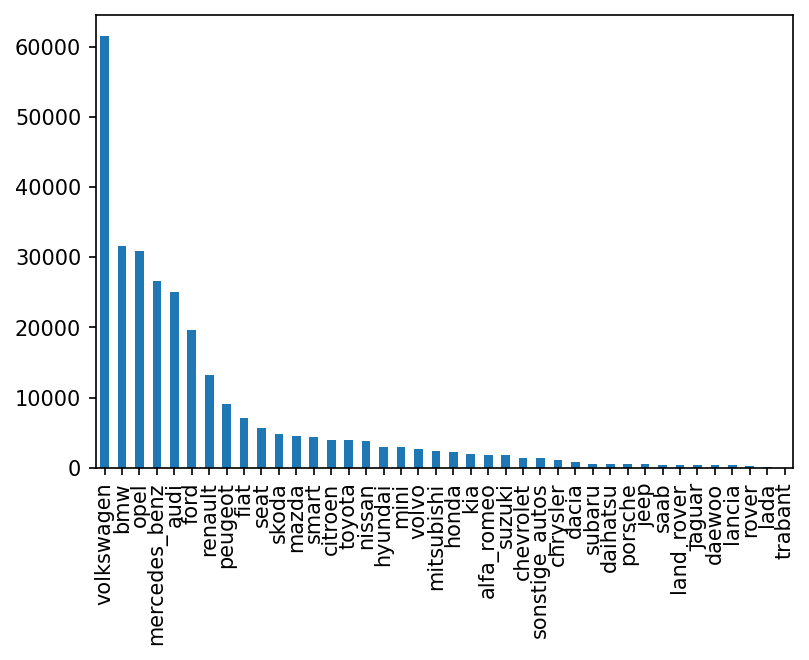

In [57]:
reminder("brand")

40 марок. пропусков нет. Если у брендов все названия моделей уникальны, то столбец с брендом не нужен. Проверим

In [58]:
unique_model = df["model"].unique()
double_brand = []
for model in unique_model:
    unique_brand = df[df["model"] == model]["brand"].unique()
    if len(unique_brand) > 1:
        double_brand.extend([model, unique_brand])
double_brand

['unknown',
 array(['audi', 'fiat', 'volkswagen', 'bmw', 'peugeot', 'alfa_romeo',
        'mitsubishi', 'sonstige_autos', 'mercedes_benz', 'renault', 'ford',
        'kia', 'opel', 'hyundai', 'seat', 'nissan', 'chrysler', 'toyota',
        'porsche', 'smart', 'volvo', 'mazda', 'land_rover', 'skoda',
        'suzuki', 'lancia', 'honda', 'mini', 'chevrolet', 'dacia',
        'jaguar', 'citroen', 'rover', 'daihatsu', 'saab', 'trabant',
        'subaru', 'daewoo', 'jeep', 'lada'], dtype=object),
 'grand',
 array(['jeep', 'suzuki', 'chrysler'], dtype=object),
 '3_reihe',
 array(['mazda', 'peugeot'], dtype=object),
 'other',
 array(['mercedes_benz', 'volkswagen', 'honda', 'mitsubishi', 'opel',
        'suzuki', 'lancia', 'mazda', 'toyota', 'renault', 'kia', 'citroen',
        'fiat', 'peugeot', 'nissan', 'ford', 'chrysler', 'chevrolet',
        'hyundai', 'audi', 'jaguar', 'skoda', 'rover', 'smart', 'saab',
        'alfa_romeo', 'porsche', 'volvo', 'mini', 'trabant', 'lada',
        'daewoo'

С unknown и other все ясно, но и прочие названия повторяются у разных брендов. По сути бренд и модель являются однородными данными. одного без другого не бывает. соединим столбцы

In [59]:
df["model"] = df["brand"] +"_"+ df["model"]
df

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,not_repaired,postal_code
1,18300,coupe,2011,manual,190,audi_unknown,125000,gasoline,audi,yes,66954
2,9800,suv,2004,auto,163,jeep_grand,125000,gasoline,jeep,NaN,90480
3,1500,small,2001,manual,75,volkswagen_golf,150000,petrol,volkswagen,no,91074
4,3600,small,2008,manual,69,skoda_fabia,90000,gasoline,skoda,no,60437
5,650,sedan,1995,manual,102,bmw_3er,150000,petrol,bmw,yes,33775
...,...,...,...,...,...,...,...,...,...,...,...
330201,7900,sedan,2010,manual,140,volkswagen_golf,150000,gasoline,volkswagen,no,75223
330203,3200,sedan,2004,manual,225,seat_leon,150000,petrol,seat,yes,96465
330207,1199,convertible,2000,auto,101,smart_fortwo,125000,petrol,smart,no,26135
330208,9200,bus,1996,manual,102,volkswagen_transporter,150000,gasoline,volkswagen,no,87439


In [60]:
# удаляем лишний признак
df = df.drop("brand", axis=1)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Интересное решение 👍
</div>

,0
isna,38720.00
isna_share,0.14
unique,3.00


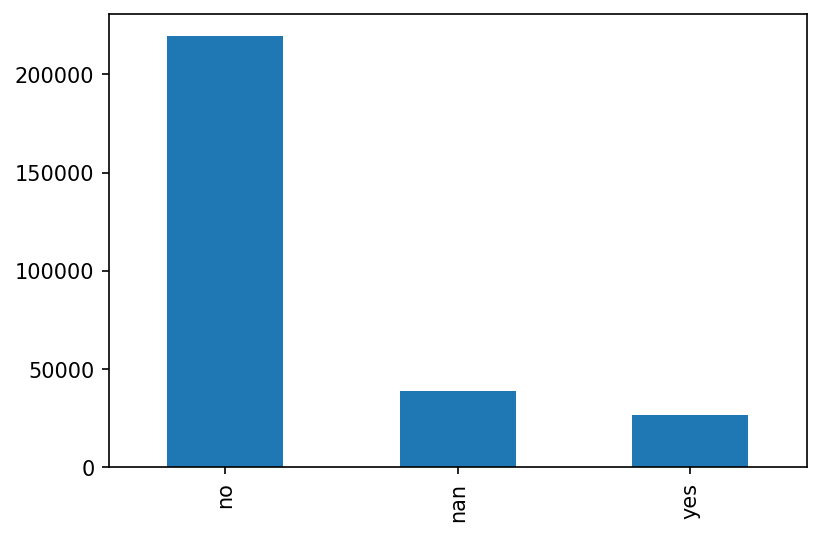

In [61]:
# не подвергался ремонту
reminder("not_repaired")

Пожалуй, здесь не стоит создавать третью категорию. Очевидно, что большинство б/у автомобилей так или иначе ремонтировалось, тем более, если в объявлении не указанно обратное

In [62]:
# заполняем пропуски значением "нет"
df["not_repaired"] = df["not_repaired"].fillna("no")

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Согласен с таким заполнением 👍
</div>

Остался почтовый индекс. Как известно, цены на автомобили могут быть разными в зависимости от региона. Индексы содержат 4-5 цифр, в то время, как российские состоят из 6. Если проверить наугад несколько почтовых индексов, все они соответствуют населенным пунктам Германии. Следовательно делаем предположение, что все эти обявления немецкие. Германия делится на 10 регионов, индексы каждого из которых начинаются со своей цифры от 0 до 9. Нулем можно объяснить то, что некоторые значения индекса имеют на одну цифру меньше. Превратим Почтовый код в категориальный признак, разделив его на 10000

In [63]:
df["postal_code"] = df["postal_code"] // 10000

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 👍
</div>

Посмотрим на распределение средней цены на самую популярную модели и на все автомобили по регионам

In [64]:
# самая популярная модель
df["model"].value_counts().head(1)

volkswagen_golf    23628
Name: model, dtype: int64

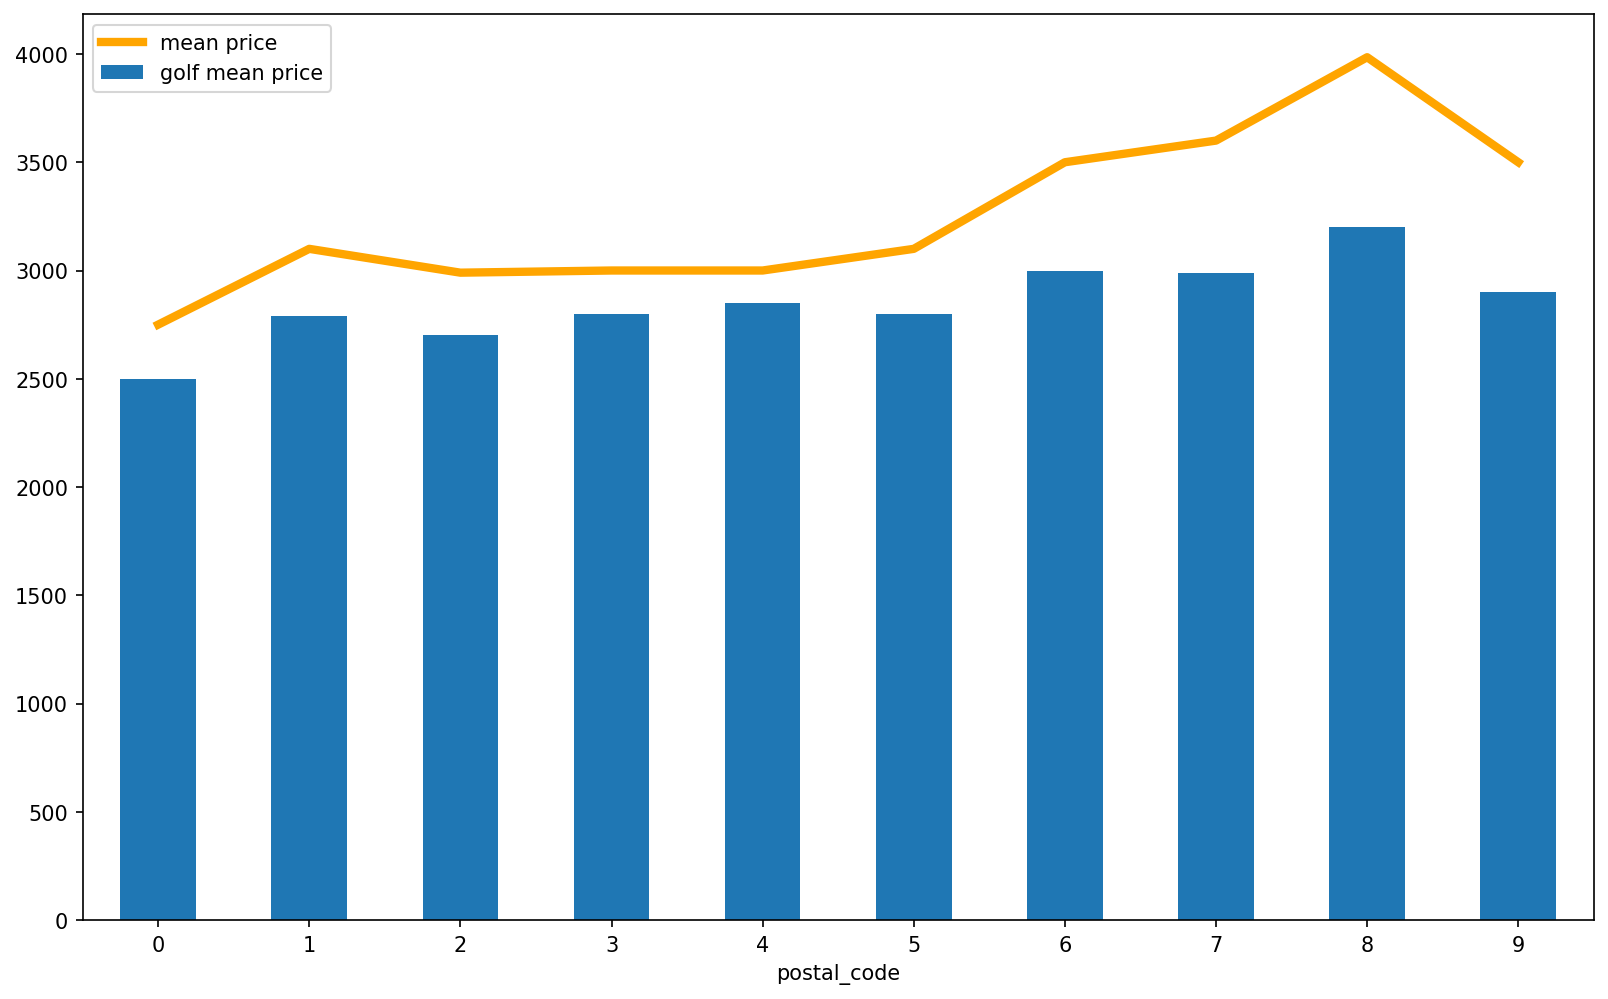

In [65]:
x = df[df["model"] == "volkswagen_golf"]
plt.figure(figsize=(13, 8), dpi=150)
x.groupby("postal_code")["price"].agg("median").plot(kind="bar", label="golf mean price")
df.groupby("postal_code")["price"].agg("median").plot(kind="line",linewidth=4, c="orange", label="mean price")
plt.legend()
plt.show()

Распределения похожи, а значит в признаке региона, вероятно, есть смысл

<Figure size 432x288 with 0 Axes>

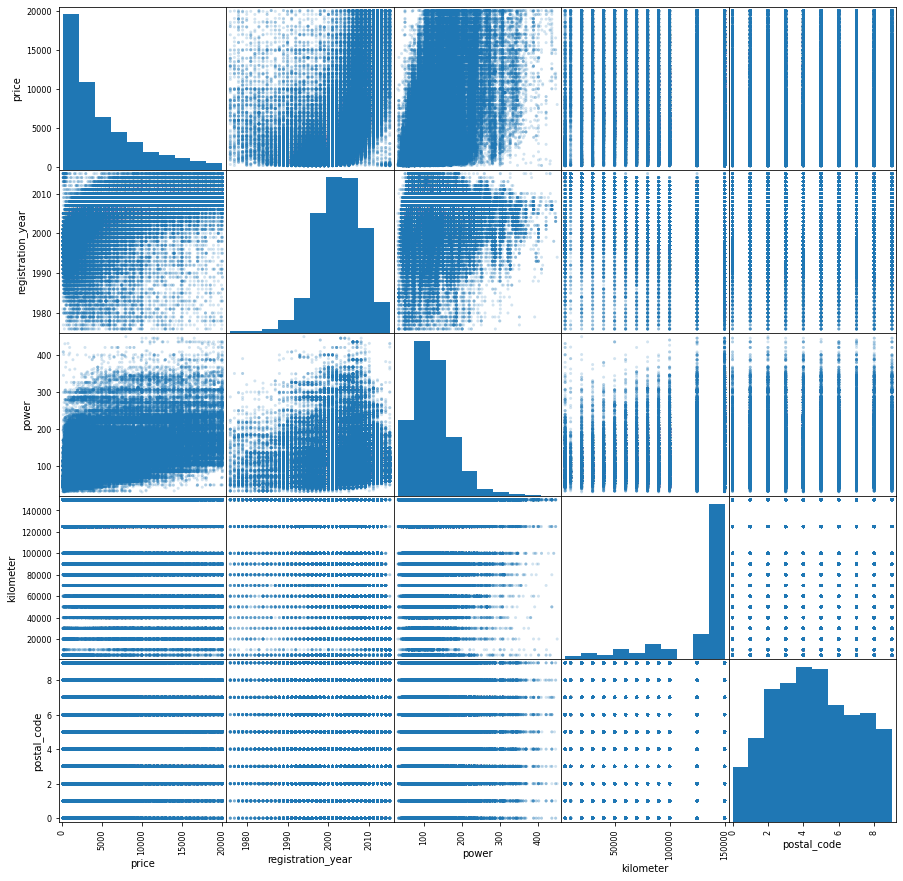

In [66]:
plt.figure()
pd.plotting.scatter_matrix(df, figsize=(15, 15), alpha=0.2)
plt.show()

<AxesSubplot:>

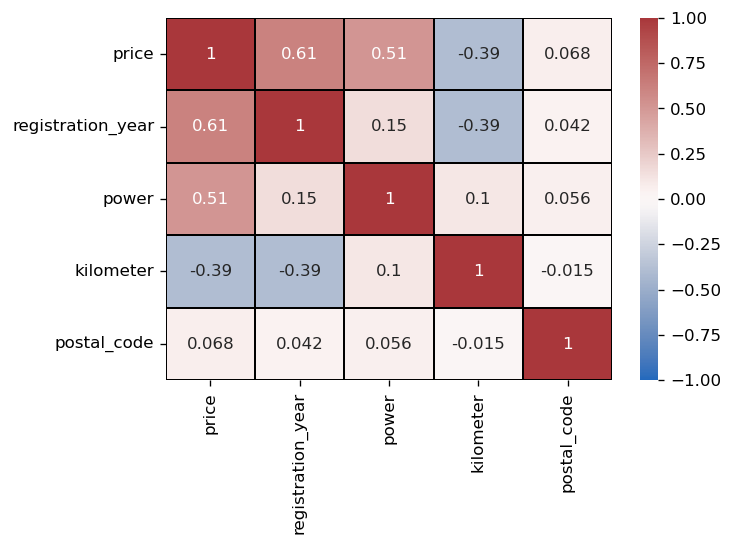

In [67]:
plt.figure(dpi=120)
sns.heatmap(df.corr(),annot = True, vmin=-1, vmax=1, center= 0, cmap= "vlag", linewidths=1, linecolor='black')

Проявилась корреляция с мощностью. Между ценой и регионом корреляции не видно, так как нет линейной зависимости. ибо регион по сути - категориальный признак

In [68]:
# проверяем, все ли пропуски заполнены
df.isna().sum()

price                0
vehicle_type         0
registration_year    0
gearbox              0
power                0
model                0
kilometer            0
fuel_type            0
not_repaired         0
postal_code          0
dtype: int64

### Вывод

В результате предобработки
* Выявлены и удалены аномальные значения
* Заполнены пропуски
* Заголовки столбцов приведены к змеиному регистру
* неинформативные признаки удалены
* Модель и марка объединены
* Почтовый код преобразован в код региона

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> Данные готовы для обучения 👍
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

После предобработки стоит еще раз проверить данные на дубликаты
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Проверял. там их много. Подумал, что это очевидно для такого объема данных после удаления столбцов с уникальными датами. Решил не заострять на этом внимание.
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

## Обучение моделей

In [69]:
# отделяем целевой признак
features = df.drop("price", axis=1)
target = df["price"]

Испробовал Standerd Scaler, так как планировал тестировать в частности линейную регрессию. Результаты не поменялись. оставляю закомментированным

In [70]:
# scaler = StandardScaler()
# num = ['registration_year', 'power', 'kilometer', 'postal_code']
# # df_not_num = df.drop(num, axis=1)
# scaler.fit(features[num])
# features[num] = scaler.transform(features[num])
# features.head()

Закодируем категориальные переменные двумя способами. при помощи Линейного и Порядкового кодирования

In [71]:
ohe_features = pd.get_dummies(features, drop_first=True)
ohe_features.head()

,registration_year,power,kilometer,postal_code,vehicle_type_convertible,vehicle_type_coupe,vehicle_type_other,vehicle_type_sedan,vehicle_type_small,vehicle_type_suv,...,model_volvo_v70,model_volvo_xc_reihe,fuel_type_electric,fuel_type_gasoline,fuel_type_hybrid,fuel_type_lpg,fuel_type_other,fuel_type_petrol,fuel_type_unknown,not_repaired_yes
1,2011,190,125000,6,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,2004,163,125000,9,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
3,2001,75,150000,9,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,2008,69,90000,6,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5,1995,102,150000,3,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Для линейных моделей прямое кодирование отлично подойдет 👍
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Для прямого кодирования можно использовать OneHotEncoder из sklearn. Так к слову)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> учту. А этот вариант хуже? Тут и импортировать ничего отдельно не надо.
</div>

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

Согласен, get_dummies тоже справляется с поставленной задачей)
    
В OHE можно настроить больше параметров
</div>

In [72]:
encoder = OrdinalEncoder()
ordinal_features = features
ordinal_features[
    ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']
] = encoder.fit_transform(ordinal_features[
    ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'not_repaired']
])
ordinal_features.head()

,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,not_repaired,postal_code
1,2.0,2011,1.0,190,23.0,125000,2.0,1.0,6
2,6.0,2004,0.0,163,119.0,125000,2.0,0.0,9
3,5.0,2001,1.0,75,310.0,150000,6.0,0.0,9
4,5.0,2008,1.0,69,267.0,90000,2.0,0.0,6
5,4.0,1995,1.0,102,25.0,150000,6.0,1.0,3


<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Для моделей, основанных на деревьях решений, порядковое кодирование отлично подойдет 👍
</div>

<div class="alert alert-block alert-warning">
<b>⚠️ Совет:</b>

Кодировать данные стоит после разбиения. Так у нас не будет утечки данных.
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Учту. Я сделал так потому, что писанины меньше. не знал, что это может привести к утечке
</div>

In [73]:
def split_fit_predict(model, features, target):
    """Функция принимает на вход модель, признаки и цель, делит их на тренировочную
    и тестовую выборки, обучает модель делает предсказание на тесте, считает
    и выводит на дисплей RMSE и время затраченное на обучение и предсказания"""
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=42)
    print("время обучения")
    %time model.fit(X_train, y_train)
    print("время предсказаний")
    %time model.predict(X_train)
#     predictions = model.predict(X_train, y_train)
#     print(f"RMSE = {mean_squared_error(y_test, predictions, squared=False)}")
    rmse = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error').mean()
    print(f"RMSE = {rmse}")

Осуществим предворительную оценку скорости обучения и качества предсказаний моделей с дефолтными параметрами на выборках закодированных разными способами

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Хороший помощник 👍
</div>

### Дерево Решений

In [74]:
tree = DecisionTreeRegressor(random_state=42)
split_fit_predict(tree, ohe_features, target)

время обучения
Wall time: 8.14 s
время предсказаний
Wall time: 415 ms
RMSE = -1941.7794353679733


In [75]:
tree1 = DecisionTreeRegressor(random_state=42)
split_fit_predict(tree1, ordinal_features, target)

время обучения
Wall time: 677 ms
время предсказаний
Wall time: 78.8 ms
RMSE = -1987.7458725321528


### Случайный Лес

In [76]:
forest = RandomForestRegressor(random_state=42)
split_fit_predict(forest, ohe_features, target)

время обучения
Wall time: 8min 36s
время предсказаний
Wall time: 9.84 s
RMSE = -1563.8092535946403


In [77]:
forest = RandomForestRegressor(random_state=42)
split_fit_predict(forest, ordinal_features, target)

время обучения
Wall time: 44.6 s
время предсказаний
Wall time: 6.29 s
RMSE = -1560.798957975123


### Линейная Регрессия

In [78]:
regression = LinearRegression()
split_fit_predict(regression, ohe_features, target)

время обучения
Wall time: 4.73 s
время предсказаний
Wall time: 507 ms
RMSE = -2381.1948987815063


In [79]:
regression = LinearRegression()
split_fit_predict(regression, ordinal_features, target)

время обучения
Wall time: 55.9 ms
время предсказаний
Wall time: 12 ms
RMSE = -2729.976768330499


### Light GBM

In [80]:
lgbm = lgb.LGBMRegressor(random_state=42, silent=True)
split_fit_predict(lgbm, ohe_features, target)

время обучения
Wall time: 1.95 s
время предсказаний
Wall time: 1.11 s
RMSE = -1658.1999614191693


In [81]:
lgbm = lgb.LGBMRegressor(random_state=42, silent=True)
split_fit_predict(lgbm, ordinal_features, target)

время обучения
Wall time: 552 ms
время предсказаний
Wall time: 277 ms
RMSE = -1632.8699019803528


### Cat Boost

In [82]:
cat = CatBoostRegressor(random_state=42, silent=True)
split_fit_predict(cat, ohe_features, target)

время обучения
Wall time: 15.1 s
время предсказаний
Wall time: 184 ms
RMSE = -1558.828080339929


In [83]:
cat = CatBoostRegressor(random_state=42, silent=True)
split_fit_predict(cat, ordinal_features, target)

время обучения
Wall time: 14.6 s
время предсказаний
Wall time: 83 ms
RMSE = -1549.8864599946069


### Вывод

* Все модели работают быстрее с выборками закодированными при помощи Ordinal Encoder 
* модели градиентного бустинга показали лучшие результаты с этим видом кодирования
* Линейная регрессия показала слишком плохие результаты, и дальше тестировать мы ее не будем
* Случайный лес работает очень медленно с OHE.
* У дерева решений на OHE  результаты лучше и не слишком плохой показатель по времени. будем тестировать его на этой выборке, а остальные на Ordinal Encoder

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Молодец, что каждый этап сопровождаешь промежуточными выводами 👍
</div>

## Оптимизация работы моделей

Разделим выборки на тренировочные и тестовые данные

In [84]:
ohe_X_train, ohe_X_test, ohe_y_train, ohe_y_test = train_test_split(ohe_features, target, test_size=0.25, random_state=42)
or_X_train, or_X_test, or_y_train, or_y_test = train_test_split(ordinal_features, target, test_size=0.25, random_state=42)

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b> 

Данные поделены верно, пропорции выбраны адекватные 👍
</div>

Напишем функцию для оптимизации параметров

In [85]:
# создаем список для результатов
final_list = []

def choose_and_optimize(model_name, model, params, features, target):
    """Функция принимает на вход имя модели, модель, гиперпараметры и обучающие 
    данные проводит кроссвалидацию с подбором параметров и возвращает 
    параметры моделей с наименьшим значением функции потерь"""
    result_list = []
    grid_search = GridSearchCV(model, params, cv=5, scoring="neg_root_mean_squared_error", n_jobs=-1)
    best_model = grid_search.fit(features, target)
    best_params = str(best_model.best_params_)
    best_score = best_model.best_score_
    result_list.append(model_name)
    result_list.append(best_params)
    result_list.append(best_score)
    final_list.append(result_list)
    print(result_list) 

### Случайный Лес

In [86]:
forest = RandomForestRegressor(random_state=42)
forest_hyper = {"max_depth": range(18, 21), "n_estimators": [140, 155, 170]}


In [87]:
%%time
choose_and_optimize("RandomForestRegressor", forest, forest_hyper, or_X_train, or_y_train)


['RandomForestRegressor', "{'max_depth': 19, 'n_estimators': 170}", -1540.1733214175351]
Wall time: 14min 2s


### Дерево Решений

In [88]:
tree = DecisionTreeRegressor(random_state=42)
tree_hyper = {"max_depth" : range(25, 32), "min_samples_leaf" : range(6, 10)}

In [89]:
%%time
choose_and_optimize("DecisionTreeRegressor", tree, tree_hyper, ohe_X_train, ohe_y_train)

['DecisionTreeRegressor', "{'max_depth': 29, 'min_samples_leaf': 8}", -1760.726748177553]
Wall time: 5min 31s


### Light GBM

In [90]:
lgbm = lgb.LGBMRegressor(random_state=42, silent=True)
lgbm_hyper = {"max_depth": range(13, 16), "n_estimators": [1500, 2000, 2500], "learning_rate": [0.15]}

In [91]:
%%time
choose_and_optimize("LGBMRegressor", lgbm, lgbm_hyper, or_X_train, or_y_train)

['LGBMRegressor', "{'learning_rate': 0.15, 'max_depth': 14, 'n_estimators': 2000}", -1485.155882542746]
Wall time: 4min 51s


### Cat Boost

In [92]:
cat = CatBoostRegressor(random_state=42, silent=True) 
cat_hyper = {"max_depth": range(9, 12), "iterations": [1500, 2000, 2500], "learning_rate": [0.15]}

In [93]:
%%time
choose_and_optimize("CatBoostRegressor", cat, cat_hyper, or_X_train, or_y_train)


['CatBoostRegressor', "{'iterations': 2000, 'learning_rate': 0.15, 'max_depth': 10}", -1478.1475785830487]
Wall time: 32min 57s


In [94]:
fl = pd.DataFrame(final_list)

In [95]:
fl

,0,1,2
0,RandomForestRegressor,"{'max_depth': 19, 'n_estimators': 170}",-1540.173321
1,DecisionTreeRegressor,"{'max_depth': 29, 'min_samples_leaf': 8}",-1760.726748
2,LGBMRegressor,"{'learning_rate': 0.15, 'max_depth': 14, 'n_es...",-1485.155883
3,CatBoostRegressor,"{'iterations': 2000, 'learning_rate': 0.15, 'm...",-1478.147579


### Вывод 

От случайного леса не удалось получить качества лучше, чем на дефолтных параметрах.  
Качество предсказаний дерева решений сильно отстает от лидеров.  
Наилучшие результаты по качеству предсказаний  показали модели градиентного бустинга. CatBoost победил с небольшим отрывом, но стоит проверить все модели на случай переобучения

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

По модельной части замечаний нет - обучение выполнено четко 💪
</div>

## Анализ моделей

### Дерево Решений

In [96]:
tree = DecisionTreeRegressor(random_state=42, max_depth=29, min_samples_leaf=8)
split_fit_predict(tree, ohe_features, target)

время обучения
Wall time: 6.57 s
время предсказаний
Wall time: 375 ms
RMSE = -1760.726748177553


### Случайный Лес

In [97]:
forest = RandomForestRegressor(random_state=42)
split_fit_predict(forest, ordinal_features, target)

время обучения
Wall time: 43.4 s
время предсказаний
Wall time: 6.27 s
RMSE = -1560.798957975123


### Light GBM

In [98]:
lgbm = lgb.LGBMRegressor(random_state=42, silent=True, max_depth=14, n_estimators=2000, learning_rate=0.15)
split_fit_predict(lgbm, ordinal_features, target)

время обучения
Wall time: 4.23 s
время предсказаний
Wall time: 3.72 s
RMSE = -1485.155882542746


### Cat Boost

In [99]:
cat = CatBoostRegressor(random_state=42, silent=True, max_depth=10, iterations=2000, learning_rate=0.15)
split_fit_predict(cat, ordinal_features, target)

время обучения
Wall time: 59.3 s
время предсказаний
Wall time: 1.16 s
RMSE = -1478.1475785830487


### Вывод

лучшие метрики качества показывают  Катбуст и ЛГБМ. Катбуст незначительно опережает. при этом Катбуст обучается дольше всех, а ЛГБМ значительно лидирует по скорости. Соответственно наиболее подходящей моделью для нашей задачи является ЛГБМ

### Поверка  наиболее подходящей модели на тестовой выборке

In [100]:
lgbm = lgb.LGBMRegressor(random_state=42, silent=True, max_depth=14, n_estimators=2000, learning_rate=0.15)
%time lgbm.fit(or_X_train, or_y_train)
%time lgbm.predict(or_X_test)
predictions = lgbm.predict(or_X_test)
rmse = mean_squared_error(or_y_test, predictions, squared=False)
print(rmse)

Wall time: 4.85 s
Wall time: 1.2 s
1453.9146017977969


Качество предсказаний на тестовой выборке улучшилось.

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

Если валидациционной выборки нет, то анализ моделей должен выглядеть так:

1. RMSE вычисляется с помощью кросс-валидации на тренировочной выборке
2. Время обучения = время model.fit(X_train, y_train)
3. Время предсказания = model.predict(X_train)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-danger">
<b>❌ Замечание:</b>

После анализа моделей нужно порекомендовать заказчику одну модель и провести на ней финальное тестирование.

Рассчитай финальную метрику лучшей модели на тестовой выборке (до этого тестовая выборка нигде не должна использоваться). RMSE должно быть меньше 2500. Если метрика не дотягивает, попробуй исправить мои замечания, также можешь потюнить гиперпараметры (на этапе обучения моделей, не на тестовой выборке!)
</div>

<div class="alert alert-block alert-success">
<b>V2 ✔️ Успешно исправлено</b>
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> Я исправил функцию split_fit_predict. Это требовалось?
</div>

<div class="alert alert-block alert-info">
<b>V2 Комментарий ревьюера:</b>

То что надо!)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Чтобы все было ясно, напишу конкретный план (структуру) обучения и анализа моделей:

1. Обучение моделей. В обучении нужно рассмотреть хотя бы одну простую модель и один бустинг. Подбор гиперпараметров нужно провести хотя бы одной модели. Тут есть два варианта:
    - без валидационной выборки. Здесь нужно подбирать гиперпараметры с помощью кросс-валидации (GridSearchCV, RandomizedSearchCV или вручную (cross_val_score));
    - валидационная выборка есть. Здесь можно не использовать кросс-валидацию и подбирать гиперпараметры вручную.  
2. Анализ моделей. После нахождения лучших гиперпараметров стоит измерить время обучения, предсказания и RMSE. Тут тоже есть два варианта:
    - без валидационной выборки. RMSE на кросс-валидации. Время обучения = время model.fit(X_train). Время предсказания  = model.predict(X_train);
    - валидационная выборка есть. RMSE на validation. Время обучения = время model.fit(X_train). Время предсказания = время model.predict(X_valid).  
    
    После этого напиши вывод по анализу (можешь также результаты моделей занести в общую таблицу) и посоветуй заказчику одну модель на основе его критериев;
3. Тестирование. Рассчитай финальную метрику лучшей модели на тестовой выборке (до этого тестовая выборка нигде не должна использоваться!). RMSE должно быть меньше 2500. Если метрика не дотягивает, попробуй исправить мои замечания, также можешь потюнить гиперпараметры (на этапе обучения моделей, не на тестовой выборке!)
</div>

<div class="alert alert-block alert-info">
<b>Комментарий студента:</b> я 3 дня вертел гиперпараметры. Оставил минимум дающий максимум и не отнимающий слишком много времени. Однажды катбуст + гридсерч работали 6 с лишним часов
</div>

<div class="alert alert-block alert-info">
<b>Комментарий ревьюера:</b>

Единственный минус нашей профессии(
</div>

## ВЫВОД 

Произведено исследование направленное на создание рекомендательной системы оценивания стоимости б/у автомобилей
* Произведено чтение данных и запись в датафрейм.
* Произведена первичная предобработка данных:
  * поиск дубликатов, нулевых и аномальных значений. 
  * Нулевые значения заполнены, дубликаты и аномалии удалены
  * Признаки оптимизированы для применения машинного обучения
  * Неинформативные признаки удалены
* Приведено исследование качества предсказаний и скорости работы алгоритмов машинного обучения на признаках закодированных двумя способами:
  * Линейная регрессия показала наихудшие результаты качества предсказаний
  * Случайный лес показал лучшие результаты на дефолтных параметрах и очень низкую скорость при прямом кодировании категориальных признаков
  * Лучшие результаты показали модели градиентного бустинга. 

Я считаю, что для поставленной задачи оптимальным вариантом является модель LGBM, так как при крайне незначительном отставании в качестве предсказаний она имеет ощутимое преимущество в скорости

<div class="alert alert-block alert-success">
<b>✔️ Успех:</b>

Вывод соответствует исследованию 👍
</div>

# <font color='orange'>Общее впечатление</font>
* Этот проект выполнен очень хорошо
* Видно, что приложено много усилий
* Молодец, что структурируешь ноутбук, приятно проверять такие работы
* У тебя чистый и лаконичный код
* Мне было интересно читать твои промежуточные выводы
* Твой уровень подачи материала находится на высоком уровне
* Исправь, пожалуйста, мои замечания. Затем отправляй на повторную проверку
* Жду новую версию проекта 👋

# <font color='orange'>Рекомендации 🔥</font>
* Доступное объяснение про работу градиентного бустинга https://www.youtube.com/watch?v=ZNJ3lKyI-EY&t=995s
* После просмотра видео можешь почитать статью про ансамбли и бустинги https://habr.com/ru/company/ods/blog/645887/
* Подбор гиперпараметров для CatBoost https://habr.com/ru/company/otus/blog/527554/
* Подбор гиперпараметров для LightGBM https://programmersought.com/article/40776531516/
* Разумные способы кодирования категориальных данных для машинного обучения https://machinelearningmastery.ru/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159/
* Статья про "непонятную" метрику ROC-AUC https://dyakonov.org/2017/07/28/auc-roc-площадь-под-кривой-ошибок/
* Хочешь подтянуть математику для DS?) https://academy.stepik.org/math-for-data-science
* Результы обучения моделей можно визуализировать 😎 https://www.datatechnotes.com/2019/08/elasticnet-regression-example-in-python.html
* В нашем деле нужно быть всегда в курсе всех новинок, новостей и тд, вот тут публикуют новости в области DS: https://www.infoq.com/data-analysis/news/
* Всем аналитикам данных рекомендую книгу Даниела Канемана "Думай медленно, решай быстро"